In [2]:
library(rms)
library(readxl)
library(Hmisc)
library(regplot)
library(DynNom)

Warning message in Design(data, formula = formula, specials = "strat"):
"Variable HR has levels Negative Positive which do not match levels given to datadist ( 0 1 ). datadist values ignored."
Warning message in Design(data, formula = formula, specials = "strat"):
"Variable HER2 has levels Negative Positive which do not match levels given to datadist ( 0 1 ). datadist values ignored."
Warning message in text.default(xl, y, points.label, adj = 0, cex = cex.var):
"font family not found in Windows font database"
Warning message in axis(..., cex.axis = cex):
"font family not found in Windows font database"
Warning message in strwidth(" ", units = units, cex = cex):
"font family not found in Windows font database"
Warning message in axis(..., cex.axis = cex):
"font family not found in Windows font database"
Warning message in strwidth(" ", units = units, cex = cex):
"font family not found in Windows font database"
Warning message in axis(..., cex.axis = cex):
"font family not found in Windo

null device 
          1

Logistic Regression Model

lrm(formula = PCR ~ HR + HER2 + Global_FD, data = Affairs)

                       Model Likelihood      Discrimination    Rank Discrim.    
                             Ratio Test             Indexes          Indexes    
Obs           435    LR chi2     139.55      R2       0.402    C       0.844    
 0            321    d.f.             3      R2(3,435)0.269    Dxy     0.688    
 1            114    Pr(> chi2) <0.0001    R2(3,252.4)0.418    gamma   0.688    
max |deriv| 5e-10                            Brier    0.133    tau-a   0.267    

              Coef    S.E.   Wald Z Pr(>|Z|)
Intercept      6.7152 1.1227  5.98  <0.0001 
HR=Positive   -1.5462 0.2661 -5.81  <0.0001 
HER2=Positive  1.1946 0.2652  4.50  <0.0001 
Global_FD     -3.9498 0.5864 -6.74  <0.0001 


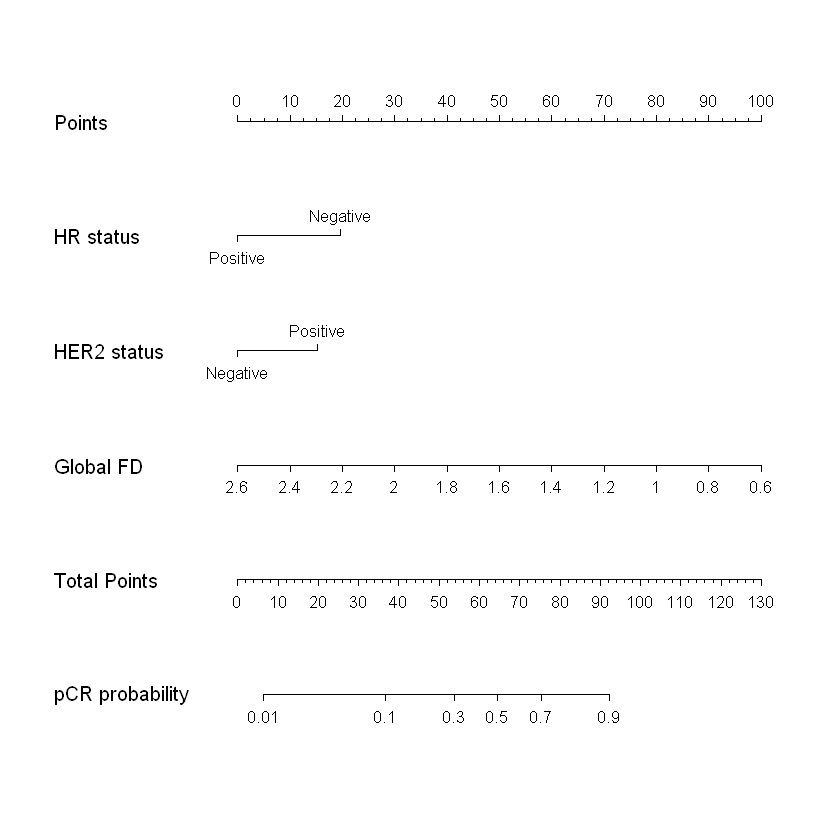

In [5]:
Affairs <- read.csv("train.csv")
ddist <- datadist(Affairs)
options(datadist='ddist')

Affairs$HR <- factor(Affairs$HR, levels=c(0,1), labels=c("Negative","Positive"))
Affairs$HER2 <- factor(Affairs$HER2, levels=c(0,1), labels=c("Negative","Positive"))
# 设置变量的名称
label(Affairs$HR) <- "HR status"
label(Affairs$HER2) <- "HER2 status"
label(Affairs$Global_FD) <- "Global FD"
# plot(nomogram)
fit <- lrm(PCR ~ HR + HER2 + Global_FD, 
           data=Affairs) 
ddist <- datadist(Affairs); 
options(datadist='ddist')
par(family="Times")     
nomogram <- nomogram(fit, fun = function(x)1/(1+exp(-x)),  # 逻辑回归计算公式
                     fun.at = c(0.01, seq(0.1, 0.9, by = 0.2),0.9),
#                      fun.at = c(0.1, seq(0.1, 0.9, by = 0.1),0.99),                     
                     funlabel = "pCR probability",lp = F)                  
png(filename="Nomogram-pCR.png", width=5, height=5, units="in", res=1000)
                  
# 绘制列线图
plot(nomogram)
dev.off()
     
plot(nomogram)
fit